# Ejercicio 1
## Obtener los datos

In [100]:
#EJERCICIO 1
# cargar librerias-----------------------------------------------
import pandas as pd
import os
import tarfile
import urllib.request
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from tabulate import tabulate
# definir las rutas y caminos donde se encuentran los datos------
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# path que se va a crear en nuestro sistema----------------------
HOUSING_PATH = os.path.join("datasets", "housing")
# lugar de descarga del dataset----------------------------------
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# definir una funcion que obtenga los datos y los descargue-----
def fetch_housing_data(housing_url=HOUSING_URL, 
housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

# definir una funcion que cargue el csv en un dataframe----------
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
    
housing = load_housing_data()

C:\Users\PabloRuiz\AppData\Local\Temp\ipykernel_21584\1609177189.py:36: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.


## Creación de la nueva variable

In [102]:
housing['oceano'] = [1 if x == '<1H OCEAN' else 
                     1 if x == 'NEAR OCEAN' else 
                     0 for x in housing['ocean_proximity']] 

# comprobacion de la variable oceano-----------------------------
print(housing.info())
print("---Ocean proximity---")
print(housing["ocean_proximity"].value_counts())
print("---Océano---")
print(housing["oceano"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  oceano              20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB
None
---Ocean proximity---
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
---Océano---
oceano
1    117

In [104]:
# importar clase-------------------------------------------------
from sklearn.linear_model import LogisticRegression
# importar estandarizador-.--------------------------------------
from sklearn.preprocessing import StandardScaler

#definir variable respuesta
x = housing["median_house_value"].values.reshape(-1,1)
#print(x)

# estandarizamos x-----------------------------------------------
scaler = StandardScaler()
x_prepared = scaler.fit_transform(x)
#print(x_prepared)

# separar variable respuesta del dataset-------------------------
y = housing["oceano"].values.reshape(-1,1).ravel()
print(y)

[0 0 0 ... 0 0 0]


## Ajuste del modelo

In [112]:
# ajustar el modelo----------------------------------------------
logistic_reg = LogisticRegression()
logistic_reg.fit(x_prepared, y)

# obtener coeficientes del modelo--------------------------------
# intercepto
print("El intercepto es = %.3f" % logistic_reg.intercept_)
# coeficientes de regresion
print("El coeficiente es = %.3f" % logistic_reg.coef_)

El intercepto es = 0.376
El coeficiente es = 0.895


C:\Users\PabloRuiz\AppData\Local\Temp\ipykernel_21584\1948206436.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
C:\Users\PabloRuiz\AppData\Local\Temp\ipykernel_21584\1948206436.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


In [114]:
# predecir clase-------------------------------------------------
x_nueva = [[250000]]

# estandarizamos la observacion
x_nueva_prepared = scaler.transform(x_nueva)
#print(x_nueva_prepared)

# predecir nueva casa--------------------------------------------
clase_predicha = logistic_reg.predict(x_nueva_prepared)
print(clase_predicha)

# calcular probabilidad------------------------------------------
clase_predicha_prob = logistic_reg.predict_proba(x_nueva_prepared)
#print(clase_predicha_prob)
# sacar por pantalla las probabilidades de 0 y de 1--------------
print("Pr(oceano = 0|median_housing_value = 250000) = %.4f" % clase_predicha_prob[0,0],",", 
"\nPr(oceano = 1|median_housing_value = 250000) = %.4f" % clase_predicha_prob[0,1],".")

[1]
Pr(oceano = 0|median_housing_value = 250000) = 0.3294 , 
Pr(oceano = 1|median_housing_value = 250000) = 0.6706 .


# Ejercicio 2
## Preparar los datos

In [116]:
# EJERCICIO 2
# CONSTRUIR MATRIZ X---------------------------------------------
# quitar variable ocean_proximity--------------------------------
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num = housing_num.drop("oceano", axis=1)
housing_num = housing_num.drop("longitude", axis=1)
housing_num = housing_num.drop("latitude", axis=1)

# importar el "imputador"----------------------------------------
from sklearn.impute import SimpleImputer
# importar el "estandarizador"-----------------------------------
from sklearn.preprocessing import StandardScaler
# importar la clase pipeline"------------------------------------
from sklearn.pipeline import Pipeline

# definir el pipeline--------------------------------------------
num_pipeline = Pipeline([
        ("imputador", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])

# aplicar el pipeline--------------------------------------------
housing_num_tr = num_pipeline.fit_transform(housing_num)
#print(housing_num_tr)

# importar clases------------------------------------------------
from sklearn.compose import ColumnTransformer

# atributos de las variables numericas---------------------------
num_attribs = list(housing_num)
#print(num_attribs)
# definir full pipeline------------------------------------------
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

housing_prepared = full_pipeline.fit_transform(housing_num)
print(housing_prepared)

[[ 0.98214266 -0.8048191  -0.97247648 ... -0.97703285  2.34476576
   2.12963148]
 [-0.60701891  2.0458901   1.35714343 ...  1.66996103  2.33223796
   1.31415614]
 [ 1.85618152 -0.53574589 -0.82702426 ... -0.84363692  1.7826994
   1.25869341]
 ...
 [-0.92485123 -0.17499526 -0.12360781 ... -0.17404163 -1.14259331
  -0.99274649]
 [-0.84539315 -0.35559977 -0.30482697 ... -0.39375258 -1.05458292
  -1.05860847]
 [-1.00430931  0.06840827  0.18875678 ...  0.07967221 -0.78012947
  -1.01787803]]


## Ajustar modelo

In [120]:
# definir matriz X
X = housing_prepared
# separar variable respuesta del dataset-------------------------
y = housing["oceano"].values.reshape(-1,1).ravel()
# ajustar el modelo----------------------------------------------

logistic_reg_m = LogisticRegression()
logistic_reg_m.fit(X, y)

# obtener coeficientes del modelo--------------------------------
# intercepto
print("El intercepto es", logistic_reg_m.intercept_)

# coeficientes de regresion
# print("Los coeficientes de las variables:", 
# list(housing_num.columns.values.tolist()) ,  "son:", 
# logistic_reg_m.coef_)
# podemos poner en una tabla estos valores-----------------------
# poner nombres de las variables en una lista--------------------
variables = housing_num.columns.values.tolist()
# poner los coeficientes en otra lista---------------------------
coefs = logistic_reg_m.coef_.tolist()[0]
# definir las filas de la tabla----------------------------------
table = zip(variables, coefs)
# imprimir las tablas con nombres de las columnas (headers)------
print(tabulate(table, headers = ["Variable", "Coeficiente"]))

El intercepto es [0.40566911]
Variable              Coeficiente
------------------  -------------
housing_median_age     -0.0738313
total_rooms            -2.008
total_bedrooms          0.122066
population              1.36485
households              0.522889
median_income           0.0465943
median_house_value      1.17541


In [124]:
# obtener observacion--------------------------------------------
housing_new = pd.DataFrame(np.array([[35, 2000, 1000, 1200, 900, 10, 250000]]), columns = variables)

# estandarizar---------------------------------------------------
scaler2 = StandardScaler()
scaler2.fit(housing_num)
housing_new_prepared = scaler2.transform(housing_new)
# valor estandarizado--------------------------------------------
print(housing_new_prepared)

# predecir clase------------------------------------------
clase_predicha = logistic_reg_m.predict(housing_new_prepared)
print(clase_predicha)

# calcular probabilidad------------------------------------------
clase_predicha_prob = logistic_reg_m.predict_proba(housing_new_prepared)

# sacar por pantalla las probabilidades de 0 y de 1--------------
print("Pr(oceano = 0|housing_new) = %.4f" % clase_predicha_prob[0,0],
",","\nPr(oceano = 1|housing_new) = %.4f" % clase_predicha_prob[0,1],
".")

[[ 0.50539419 -0.29142558  1.09671839 -0.19910795  1.04744666  3.22634352
   0.37388967]]
[1]
Pr(oceano = 0|housing_new) = 0.1242 , 
Pr(oceano = 1|housing_new) = 0.8758 .


# Ejercicio 3

C:\Users\PabloRuiz\anaconda3\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


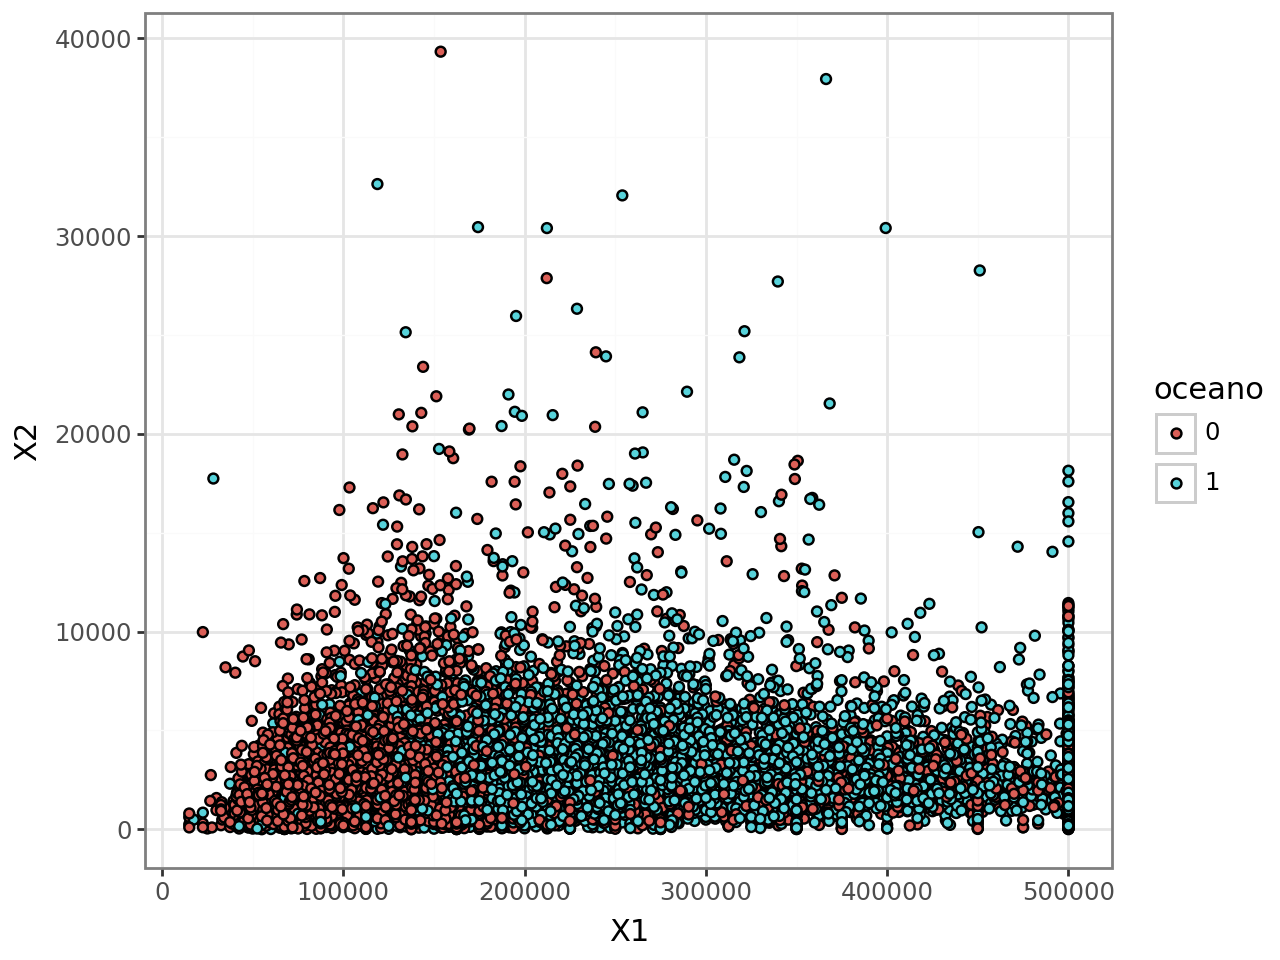

In [87]:
#EJERCICIO 3
#seleccionar predictores-----------------------------------------
predictores = housing_num[["median_house_value", "total_rooms"]]

# pegar la clase a la base con los predictores estandarizados----
puntos = predictores.copy()
puntos["oceano"] = housing[["oceano"]]
puntos["oceano"] = puntos["oceano"].astype(object)

puntos.head()
puntos.info()
# pintar la clase------------------------------------------------
(
    ggplot(puntos, aes(x = "median_house_value", y = "total_rooms", fill = "oceano")) +
    geom_point() +
    ylab("X2") +
    xlab("X1") +
    theme_bw() +
    theme(legend_position = "right", subplots_adjust={'right': 0.8})
)

C:\Users\PabloRuiz\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


clase
1    7301
0    2900
Name: count, dtype: int64


C:\Users\PabloRuiz\anaconda3\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


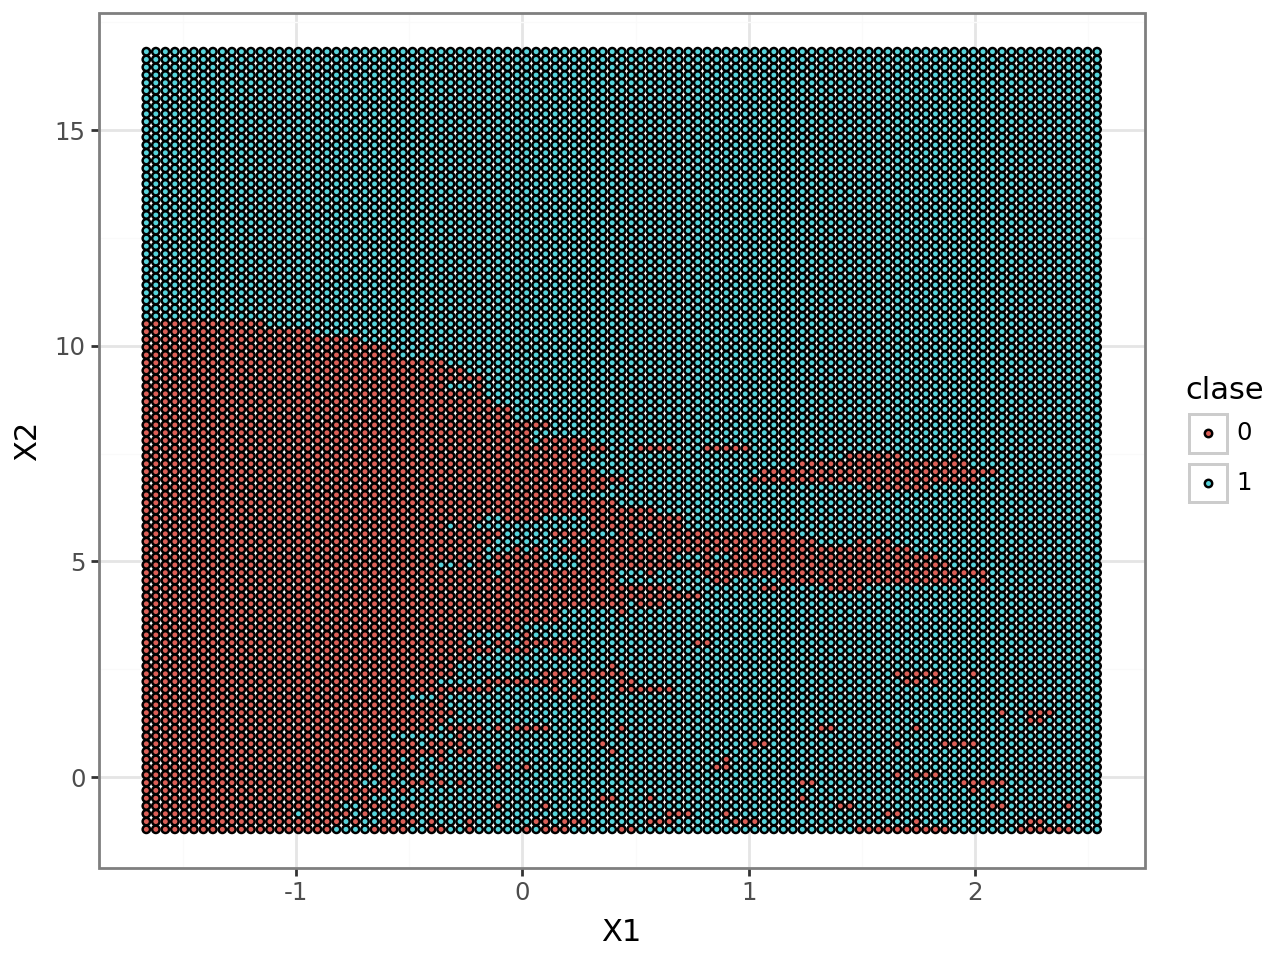

In [126]:
# estandarizar predictores---------------------------------------
scaler3 = StandardScaler()
scaler3.fit(predictores)
predictores_prepared = scaler3.transform(predictores)

from sklearn.neighbors import KNeighborsClassifier
# crear modelo con K = 10----------------------------------------
model_KNN_10 = KNeighborsClassifier(n_neighbors = 10)
# utilizamos un modelo donde usamos todos los puntos-------------
model_KNN_10.fit(predictores_prepared, y)

# definimos una rejilla de puntos
# valores de x1
min_x1 = min(predictores_prepared[:,0])
max_x1 = max(predictores_prepared[:,0])
x1_values = np.linspace(min_x1, max_x1, 101)

# valores de x2
min_x2 = min(predictores_prepared[:,1])
max_x2 = max(predictores_prepared[:,1])
x2_values = np.linspace(min_x2, max_x2, 101)

x1_grid, x2_grid =  np.meshgrid(x1_values, x2_values)  
x1_grid = x1_grid.flatten()
x2_grid = x2_grid.flatten() 
x_grid = pd.DataFrame({'x1':x1_grid, 'x2':x2_grid})

# tipos----------------------------------------------------------
pred_10 = model_KNN_10.predict(x_grid)

regiones_10 = x_grid.copy()

# pegar los tipos predichos a la rejilla-------------------------
regiones_10["clase"] = pred_10
regiones_10["clase"] = regiones_10["clase"].astype(object)

# ver cuantos hay de cada en la rejilla
print(regiones_10["clase"].value_counts())

# pintar la rejilla----------------------------------------------
(
    ggplot(regiones_10, aes(
    x = "x1", 
    y = "x2",
    fill = "clase")) +
    geom_point(size = 1) +
    ylab("X2") +
    xlab("X1") +
    theme_bw() +
    theme(legend_position = "right",
subplots_adjust={'right': 0.8})
)

C:\Users\PabloRuiz\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


clase
1    6592
0    3609
Name: count, dtype: int64


C:\Users\PabloRuiz\anaconda3\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


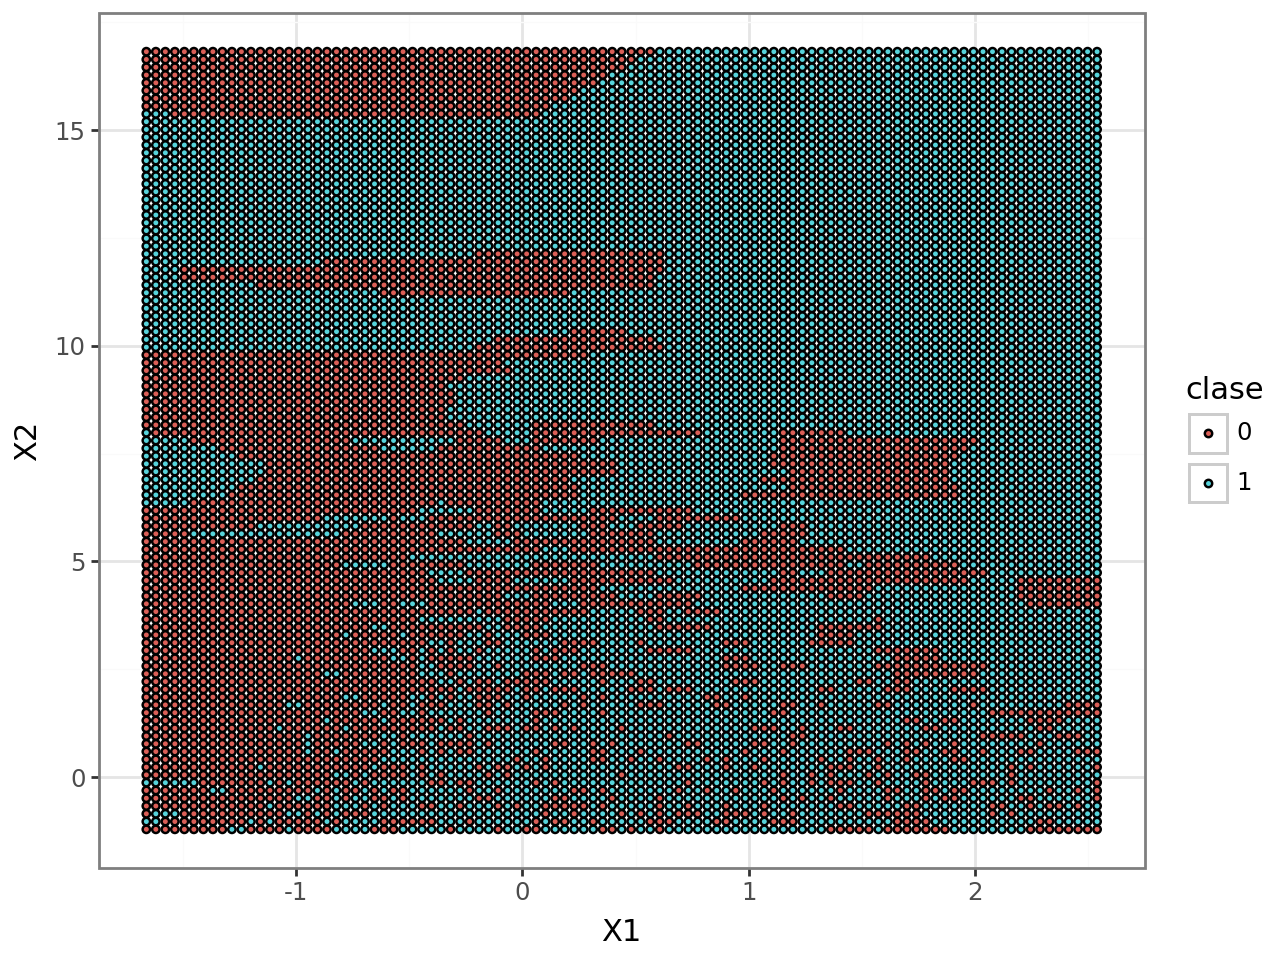

In [128]:
from sklearn.neighbors import KNeighborsClassifier
# crear modelo con K = 1----------------------------------------
model_KNN_1 = KNeighborsClassifier(n_neighbors = 1)
# utilizamos un modelo donde usamos todos los puntos-------------
model_KNN_1.fit(predictores_prepared, y)

# tipos----------------------------------------------------------
pred_1 = model_KNN_1.predict(x_grid)

regiones_1 = x_grid.copy()
# pegar los tipos predichos a la rejilla-------------------------
regiones_1["clase"] = pred_1
regiones_1["clase"] = regiones_1["clase"].astype(object)
print(regiones_1["clase"].value_counts())

# pintar la rejilla----------------------------------------------
(
    ggplot(regiones_1, aes(
    x = "x1", 
    y = "x2",
    fill = "clase")) +
    geom_point(size = 1) +
    ylab("X2") +
    xlab("X1") +
    theme_bw() +
    theme(legend_position = "right",
subplots_adjust={'right': 0.8})
)

C:\Users\PabloRuiz\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


clase
1    7573
0    2628
Name: count, dtype: int64


C:\Users\PabloRuiz\anaconda3\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


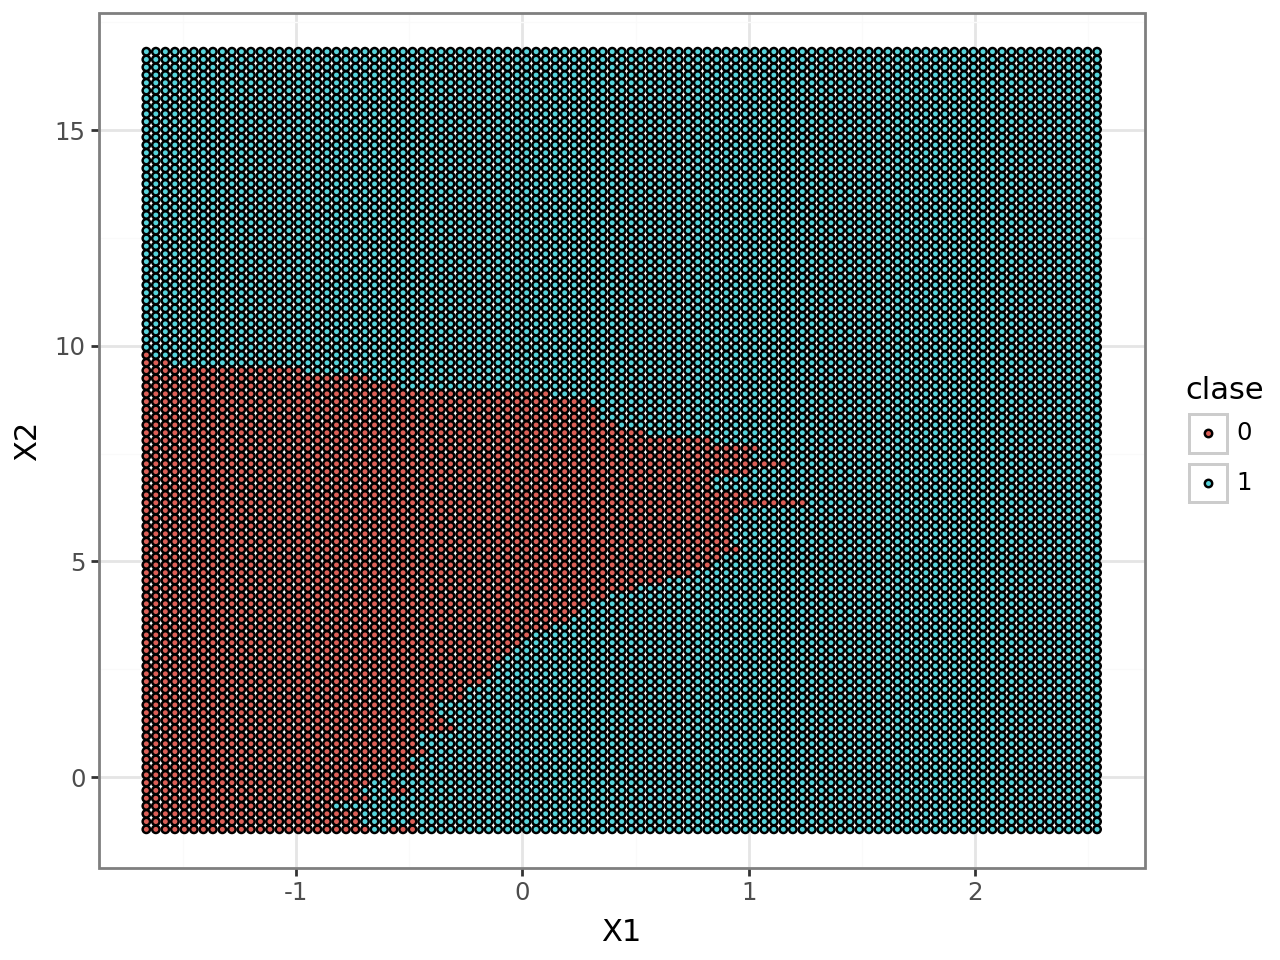

In [130]:
from sklearn.neighbors import KNeighborsClassifier
# crear modelo con K = 100----------------------------------------
model_KNN_100 = KNeighborsClassifier(n_neighbors = 100)
# utilizamos un modelo donde usamos todos los puntos-------------
model_KNN_100.fit(predictores_prepared, y)

# tipos----------------------------------------------------------
pred_100 = model_KNN_100.predict(x_grid)

regiones_100 = x_grid.copy()
# pegar los tipos predichos a la rejilla-------------------------
regiones_100["clase"] = pred_100
regiones_100["clase"] = regiones_100["clase"].astype(object)
print(regiones_100["clase"].value_counts())

# pintar la rejilla----------------------------------------------
(
    ggplot(regiones_100, aes(
    x = "x1", 
    y = "x2",
    fill = "clase")) +
    geom_point(size = 1) +
    ylab("X2") +
    xlab("X1") +
    theme_bw() +
    theme(legend_position = "right",
subplots_adjust={'right': 0.8})
)

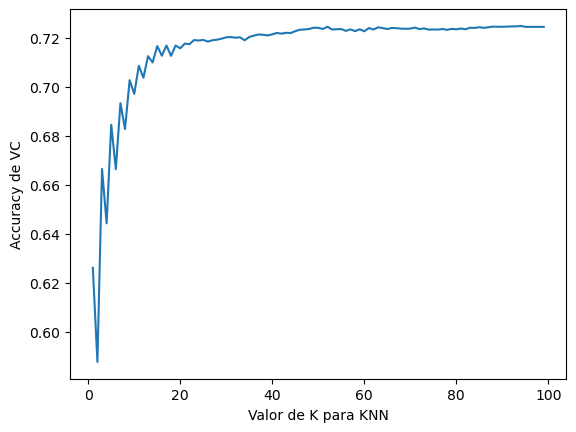

El valor de K que maximiza la accuracy es 94


In [132]:
# Encontrar el valor optimo de K
from sklearn.model_selection import cross_val_score
# valores de K que vamos a probar--------------------------------
k_range = range(1, 100)
# inicializar vector de puntuaciones-----------------------------
k_scores = []
# bucle
for k in k_range:
    # ajustar el modelo con k vecinos
    knn = KNeighborsClassifier(n_neighbors=k)
    # obtener puntuaciones de VC
    scores = cross_val_score(knn, predictores_prepared, y, cv = 10, scoring = "accuracy")
    # Guardar puntuaciones en el vector
    k_scores.append(scores.mean())
# print(k_scores)
# pintar valores-------------------------------------------------
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Accuracy de VC')
plt.show()

print("El valor de K que maximiza la accuracy es", 
np.argmax(k_scores) + 1)